In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 

In [142]:
data=pd.read_csv("Employee_attrition.csv")

In [143]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research___Development,8,1,Life_Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research___Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research___Development,3,4,Life_Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research___Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [145]:
data.isnull().any() # no missing values

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [146]:
data_numeric=data.select_dtypes(exclude="object")
data_object=data.select_dtypes(include="object")

In [147]:
data_numeric.var()==0

Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [148]:
data_numeric=data_numeric.drop('StandardHours', axis=1)

In [149]:
for i in data_object.columns:
    print(data_object[i].unique())

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research___Development' 'Human_Resources']
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree'
 'Human_Resources']
['Female' 'Male']
['Sales_Executive' 'Research_Scientist' 'Laboratory_Technician'
 'Manufacturing_Director' 'Healthcare_Representative' 'Manager'
 'Sales_Representative' 'Research_Director' 'Human_Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


In [150]:
data_object=data_object.drop("Over18", axis=1)

In [151]:
data_object.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life_Sciences,Female,Sales_Executive,Single,Yes
1,No,Travel_Frequently,Research___Development,Life_Sciences,Male,Research_Scientist,Married,No
2,Yes,Travel_Rarely,Research___Development,Other,Male,Laboratory_Technician,Single,Yes
3,No,Travel_Frequently,Research___Development,Life_Sciences,Female,Research_Scientist,Married,Yes
4,No,Travel_Rarely,Research___Development,Medical,Male,Laboratory_Technician,Married,No


In [152]:
data_dummies=pd.get_dummies(data_object,prefix=data_object.columns,drop_first=True)

In [153]:
data_dummies.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research___Development,Department_Sales,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


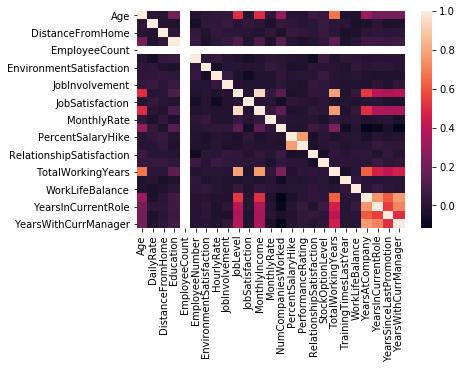

In [154]:
sns.heatmap(data_numeric.corr())

In [155]:
data_final=data_numeric.join(data_dummies)

In [156]:
data["Attrition"].value_counts() #descrive the dependent variable

No     1233
Yes     237
Name: Attrition, dtype: int64

In [157]:
data_final.Attrition_Yes.value_counts()/len(data_final)*100 #in percentige Means that 83.9% of employees (or 1233 employees) did not leave the company 

0    83.877551
1    16.122449
Name: Attrition_Yes, dtype: float64

In [158]:
data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


# Logistic Regression

In [159]:
Y=data_final.Attrition_Yes
X=data_final.drop("Attrition_Yes",axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [160]:
Y

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
       ..
1440    0
1441    0
1442    1
1443    0
1444    1
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    1
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
1460    0
1461    1
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Yes, Length: 1470, dtype: uint8

In [161]:
formula='Attrition_Yes~'+'+'.join(X.columns.tolist())
formula

'Attrition_Yes~Age+DailyRate+DistanceFromHome+Education+EmployeeCount+EmployeeNumber+EnvironmentSatisfaction+HourlyRate+JobInvolvement+JobLevel+JobSatisfaction+MonthlyIncome+MonthlyRate+NumCompaniesWorked+PercentSalaryHike+PerformanceRating+RelationshipSatisfaction+StockOptionLevel+TotalWorkingYears+TrainingTimesLastYear+WorkLifeBalance+YearsAtCompany+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager+BusinessTravel_Travel_Frequently+BusinessTravel_Travel_Rarely+Department_Research___Development+Department_Sales+EducationField_Life_Sciences+EducationField_Marketing+EducationField_Medical+EducationField_Other+EducationField_Technical_Degree+Gender_Male+JobRole_Human_Resources+JobRole_Laboratory_Technician+JobRole_Manager+JobRole_Manufacturing_Director+JobRole_Research_Director+JobRole_Research_Scientist+JobRole_Sales_Executive+JobRole_Sales_Representative+MaritalStatus_Married+MaritalStatus_Single+OverTime_Yes'

In [162]:
logit=Logit.from_formula(formula=formula, data=data_final).fit()

         Current function value: 0.291829
         Iterations: 35


C:\Users\Marta\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [163]:
logit.summary()

C:\Users\Marta\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Marta\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Marta\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Marta\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1424
Method:                           MLE   Df Model:                           45
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:                  0.3393
Time:                        08:19:31   Log-Likelihood:                -428.99
converged:                      False   LL-Null:                       -649.29
                                        LLR p-value:                 2.321e-66
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -5.2336        nan        nan        nan         nan         nan
Age                                  -0.0315      0.014     -2.320      0.020      -0.058      -0.005
DailyRate                            -0.0003      0.000     -1.290      0.197      -0.001       0.000
DistanceFromHome                      0.0459      0.011      4.250      0.000       0.025       0.067
Education                             0.0115      0.088      0.130      0.896      -0.161       0.184
EmployeeCount                        -5.2336        nan        nan        nan         nan         nan
EmployeeNumber                       -0.0002      0.000     -1.015      0.310      -0.000       0.000
EnvironmentSatisfaction              -0.4341      0.083     -5.229      0.000      -0.597      -0.271
HourlyRate                            0.0012      0.004      0.262      0.793      -0.007       0.010
JobInvolvement                       -0.5269      0.123     -4.294      0.000      -0.767      -0.286
JobLevel                             -0.0938      0.316     -0.296      0.767      -0.714       0.526
JobSatisfaction                      -0.4143      0.082     -5.082      0.000      -0.574      -0.255
MonthlyIncome                      1.347e-05   8.15e-05      0.165      0.869      -0.000       0.000
MonthlyRate                        5.612e-06   1.25e-05      0.448      0.654    -1.9e-05    3.02e-05
NumCompaniesWorked                    0.1945      0.039      5.008      0.000       0.118       0.271
PercentSalaryHike                    -0.0233      0.039     -0.592      0.554      -0.100       0.054
PerformanceRating                     0.1165      0.399      0.292      0.770      -0.666       0.899
RelationshipSatisfaction             -0.2654      0.083     -3.201      0.001      -0.428      -0.103
StockOptionLevel                     -0.1930      0.159     -1.216      0.224      -0.504       0.118
TotalWorkingYears                    -0.0599      0.029     -2.042      0.041      -0.117      -0.002
TrainingTimesLastYear                -0.1884      0.073     -2.576      0.010      -0.332      -0.045
WorkLifeBalance                      -0.3725      0.124     -2.999      0.003      -0.616      -0.129
YearsAtCompany                        0.0961      0.039      2.470      0.014       0.020       0.172
YearsInCurrentRole                   -0.1513      0.046     -3.323      0.001      -0.241      -0.062
YearsSinceLastPromotion               0.1735      0.042      4.090      0.000       0.090       0.257
YearsWithCurrManager                 -0.1367      0.047     -2.907      0.004      -0.229      -0.045
BusinessTravel_Travel_Frequently      1.9092      0.412      4.635      0.000       1.102       2.716
BusinessTravel_Travel_Rarely          1.0269      0.380      2.704      0.007       0.282       1.771
Department_Research___Development    12.8012        nan        nan        nan  

In [164]:
#As we see age is decreasing the chances of attrition. Longer distances increase the probability of Attrition. Other variables having significant influence on employee attrition are environment satisfaction, job involvement, relationship satisfaction, number of years in employment, gender, department sales, being from HR department, and being single. Overall, age, environment satisfaction, job involvement, job satisfaction, relationship satisfaction, work-life balance, years in current role decrease the chance of attrition. All the other significant variables (p<0.05) increase the chance of attrition. For instance, each more company that the employee has worked before increases the odds of attrition by 0.19, leaving all the other variables constant. 

In [165]:
logit_sk=LogisticRegression()

In [166]:
logit_sk=logit_sk.fit(x_train,y_train)

In [167]:
logit_sk.score(x_test,y_test)

0.8885869565217391

In [168]:
#Our predictive power increased from 83.9 to 89.9 when we decided to use logistic regression instead of considering everyone as not attriting

# Decision Tree

In [169]:
tree_1=DecisionTreeClassifier(random_state=42)
tree_1.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [170]:
importances=tree_1.feature_importances_
importances=pd.DataFrame(data=importances, index=X.columns, columns=['importances'])

In [171]:
importances.sort_values(by="importances", ascending=False) # Monthly Income has a very high importance compared to the others

,importances
MonthlyIncome,0.124323
OverTime_Yes,0.075114
DailyRate,0.061369
Age,0.056994
TotalWorkingYears,0.056927
HourlyRate,0.053258
NumCompaniesWorked,0.049662
TrainingTimesLastYear,0.042899
JobSatisfaction,0.041527
EnvironmentSatisfaction,0.036630


In [172]:
tree_gr=export_graphviz(tree_1,out_file="tree2.dot", class_names=True, feature_names=X.columns, filled=True) 

In [173]:
#We went to http://webgraphviz.com/ and saw that the tree was huge, that's why we will trim the tree, but befor that let's check the accuracy of the current tree

In [174]:
tree_1.score(x_test,y_test)

0.7907608695652174

In [175]:
#the accuracy of the prediction has decreased, even compared to the default rate, much lower than the accuracy from logistic regression. THat is why we will not even try to trim the tree 

# Partial Least Square Regression

In [178]:
Data=pd.read_excel("Education.xlsx", sheetname="education")

C:\Users\Marta\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [179]:
Data.head()

,num,sup.help,sup.under,sup.safe,sup.conc,adv.comp,adv.acces,adv.comm,adv.qual,tut.prof,...,sat.glad,sat.expe,sat.over,loy.proud,loy.recom,loy.asha,loy.back,gender,scholarships,job
0,1,7,1,7,4,5,5,6,6,5,...,7,7,7,7,7,1,7,female,yes_scholship,no_job
1,2,7,1,6,4,6,6,5,6,6,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job
2,3,6,1,6,6,6,6,6,6,6,...,7,6,6,7,7,1,7,female,yes_scholship,no_job
3,4,1,7,3,1,1,2,1,1,3,...,1,1,1,1,1,7,1,male,no_scholship,no_job
4,5,6,5,5,7,7,6,7,7,7,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job


In [180]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
num             181 non-null int64
sup.help        181 non-null int64
sup.under       181 non-null int64
sup.safe        181 non-null int64
sup.conc        181 non-null int64
adv.comp        181 non-null int64
adv.acces       181 non-null int64
adv.comm        181 non-null int64
adv.qual        181 non-null int64
tut.prof        181 non-null int64
tut.sched       181 non-null int64
tut.stud        181 non-null int64
tut.qual        181 non-null int64
val.devel       181 non-null int64
val.deci        181 non-null int64
val.meet        181 non-null int64
val.info        181 non-null int64
sat.glad        181 non-null int64
sat.expe        181 non-null int64
sat.over        181 non-null int64
loy.proud       181 non-null int64
loy.recom       181 non-null int64
loy.asha        181 non-null int64
loy.back        181 non-null int64
gender          181 non-null object
scholarships    181

In [181]:
Data. isnull().any()

num             False
sup.help        False
sup.under       False
sup.safe        False
sup.conc        False
adv.comp        False
adv.acces       False
adv.comm        False
adv.qual        False
tut.prof        False
tut.sched       False
tut.stud        False
tut.qual        False
val.devel       False
val.deci        False
val.meet        False
val.info        False
sat.glad        False
sat.expe        False
sat.over        False
loy.proud       False
loy.recom       False
loy.asha        False
loy.back        False
gender          False
scholarships    False
job             False
dtype: bool

In [182]:
Data_numeric = Data.select_dtypes(exclude=["object", "datetime64"])
Data_object = Data.select_dtypes(include=["object"])

In [183]:
Data_object.head()

,gender,scholarships,job
0,female,yes_scholship,no_job
1,female,yes_scholship,yes_job
2,female,yes_scholship,no_job
3,male,no_scholship,no_job
4,female,yes_scholship,yes_job


In [184]:
for i in Data_object.columns:
    j=Data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

gender 
 female    133
male       48
Name: gender, dtype: int64 
 

--------------------
scholarships 
 yes_scholship    105
no_scholship      76
Name: scholarships, dtype: int64 
 

--------------------
job 
 yes_job    95
no_job     86
Name: job, dtype: int64 
 

--------------------


In [187]:
Data_numeric.var()==0

num          False
sup.help     False
sup.under    False
sup.safe     False
sup.conc     False
adv.comp     False
adv.acces    False
adv.comm     False
adv.qual     False
tut.prof     False
tut.sched    False
tut.stud     False
tut.qual     False
val.devel    False
val.deci     False
val.meet     False
val.info     False
sat.glad     False
sat.expe     False
sat.over     False
loy.proud    False
loy.recom    False
loy.asha     False
loy.back     False
dtype: bool

In [190]:
data_numeric.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [191]:
Data_numeric.head()

,num,sup.help,sup.under,sup.safe,sup.conc,adv.comp,adv.acces,adv.comm,adv.qual,tut.prof,...,val.deci,val.meet,val.info,sat.glad,sat.expe,sat.over,loy.proud,loy.recom,loy.asha,loy.back
0,1,7,1,7,4,5,5,6,6,5,...,5,6,7,7,7,7,7,7,1,7
1,2,7,1,6,4,6,6,5,6,6,...,4,7,6,7,7,7,7,7,1,7
2,3,6,1,6,6,6,6,6,6,6,...,7,7,7,7,6,6,7,7,1,7
3,4,1,7,3,1,1,2,1,1,3,...,1,1,2,1,1,1,1,1,7,1
4,5,6,5,5,7,7,6,7,7,7,...,7,7,7,7,7,7,7,7,1,7


In [194]:
del Data_numeric["num"]

In [196]:
Data_numeric.head()

,sup.help,sup.under,sup.safe,sup.conc,adv.comp,adv.acces,adv.comm,adv.qual,tut.prof,tut.sched,...,val.deci,val.meet,val.info,sat.glad,sat.expe,sat.over,loy.proud,loy.recom,loy.asha,loy.back
0,7,1,7,4,5,5,6,6,5,4,...,5,6,7,7,7,7,7,7,1,7
1,7,1,6,4,6,6,5,6,6,6,...,4,7,6,7,7,7,7,7,1,7
2,6,1,6,6,6,6,6,6,6,6,...,7,7,7,7,6,6,7,7,1,7
3,1,7,3,1,1,2,1,1,3,2,...,1,1,2,1,1,1,1,1,7,1
4,6,5,5,7,7,6,7,7,7,7,...,7,7,7,7,7,7,7,7,1,7


In [198]:
data_dummy = pd.get_dummies(Data_object,prefix=Data_object.columns,drop_first=True)

In [199]:
data_dummy.head()

,gender_male,scholarships_yes_scholship,job_yes_job
0,0,1,0
1,0,1,1
2,0,1,0
3,1,0,0
4,0,1,1


In [200]:
Data=Data_numeric.join(data_dummy)

In [283]:
Y=Data[["sat.glad","sat.expe","sat.over"]]
X=scale(Data.drop(columns=['sat.glad', 'sat.expe', 'sat.over']))

In [284]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42) #75% and 25% split

In [285]:
pls = PLSRegression(10)  #decide the number of latent variables
pls=pls.fit(x_train,y_train)

In [286]:
pred=pls.predict(x_test)

In [287]:
pls_r2=pls.score(x_test,y_test) #Our R-square is about 39.9%
print(pls_r2)

0.3992462891028508


In [288]:
#We can also get the coefficients for all variables
coef=pd.DataFrame(pls.coef_)
coef.head()

,0,1,2
0,-0.077135,-0.033171,-0.092130
1,-0.032974,-0.124320,-0.037980
2,0.054252,0.082384,0.057091
3,0.088121,0.091096,-0.006109
4,0.044620,0.022324,0.078656


In [289]:
#Now let's get the scores of the latent variables
sc=pd.DataFrame(pls.x_scores_)
sc.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1.857488,0.135972,0.834558,-0.006549,1.293016,-0.001152,-0.395588,-1.068967,-0.412983,-0.354770
1,2.402849,-0.086563,-0.071612,-1.320193,0.394157,0.419815,1.036489,-0.359608,-1.232839,-0.066086
2,2.964833,-0.774967,0.655197,-0.558012,-1.062887,0.032069,0.234069,-0.133934,0.728178,-0.927250
3,-7.854183,-1.930184,-0.087143,0.849692,0.479611,0.150603,0.228401,-0.208458,0.015449,-0.096525
4,-1.907536,1.811248,-0.014703,-1.903963,0.461757,-0.838268,-0.854103,1.278542,-0.428882,-0.771646
5,-2.717568,1.481892,1.218203,-1.045390,-0.216786,0.725568,-0.260276,-1.294175,-0.653013,-0.237660
6,1.779063,-0.163591,0.700950,1.417867,-0.185949,-0.329897,-0.269422,0.134223,-0.618873,0.331314
7,1.125580,0.164947,1.412495,-0.538073,0.166137,-0.725577,-1.686038,-0.007369,0.317522,0.235027
8,-2.857575,-0.126771,0.342394,-0.102752,0.538743,0.848334,0.422958,1.121948,-1.026210,0.538912
9,0.830506,-0.053800,-0.678404,1.947233,1.272058,-0.708800,0.055239,0.627426,0.569102,1.053155


In [290]:
#Now we can understand how much of the variance in the dependent variables is explained by the new latent variables
var_xcores=np.var(pls.x_scores_,axis=0) #variance for each latent variable
print(var_xcores)

[9.25475763 1.25707714 1.31975286 1.10981346 0.76261479 0.79077988
 0.59964668 0.47851706 0.53425652 0.36166496]


In [292]:
total_var=np.sum(np.var(x_train,axis=0)) #and the total variance of all latent variables
print(total_var)

24.044296963026554


In [293]:
# The proportion of variance of latents in X
X_Variance=pd.DataFrame((var_xcores/total_var).round(3), columns={"X_Variance"}).reset_index()

In [294]:
#Finally we can calculate the cumulatove variance caused by the latent variables
X_Variance = X_Variance.rename(columns={'index': 'Latent_Factors'})
X_Variance['Cummulative_X_Variance'] = X_Variance['X_Variance'].cumsum().round(3) #calculates cummulative variance
print(X_Variance)

   Latent_Factors  X_Variance  Cummulative_X_Variance
0               0       0.385                   0.385
1               1       0.052                   0.437
2               2       0.055                   0.492
3               3       0.046                   0.538
4               4       0.032                   0.570
5               5       0.033                   0.603
6               6       0.025                   0.628
7               7       0.020                   0.648
8               8       0.022                   0.670
9               9       0.015                   0.685


In [ ]:
#Above we see that the variance caused by the first latent is the biggest as expected, and it decreases with each latent. The gap between the first and second latents is quite big and probably we will be able to see that graphically

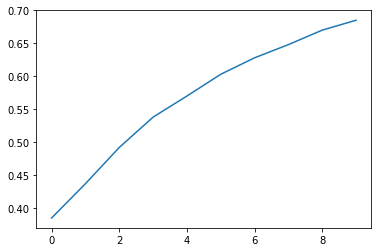

In [295]:
#we can see the change graphically
plt.plot(X_Variance.Latent_Factors,X_Variance.Cummulative_X_Variance)
plt.show()

In [ ]:
#The praph shows that with the second variable the variance becomes less significant/importnat